In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import sqlite3

# Connect to the SQL database that stores all PGA Tour data from 2015-2025 relevant to this project

conn = sqlite3.connect('PGATourData_15_25.db')

df = pd.read_sql_query("SELECT * FROM pgatour_data", conn)

In [23]:
df.head()

,YEAR,PLAYER,ROUNDS,COUNTRY,SG:_TOTAL,BIRDIE_OR_BETTER_PERCENTAGE,BOGEY_AVOIDANCE,PAR_3_SCORING_AVERAGE,PAR_4_SCORING_AVERAGE,PAR_5_SCORING_AVERAGE,...,ONE_PUTT_PERCENTAGE,3_PUTT_AVOIDANCE,BIRDIE_OR_BETTER_CONVERSION_PERCENTAGE,3_PUTT_AVOIDANCE___INSIDE_5',3_PUTT_AVOIDANCE___5_10',3_PUTT_AVOIDANCE___10_15',3_PUTT_AVOIDANCE___15_20',3_PUTT_AVOIDANCE___20_25',3_PUTT_AVOIDANCE_>_25',AVERAGE_DISTANCE_OF_PUTTS_MADE
0,2015,Aaron Baddeley,66.0,Australia,-0.223,0.2065,0.1637,2.99,4.10,4.57,...,0.4272,0.0225,0.3152,0.0076,0.0046,0.0113,0.0141,0.0114,0.0662,79.416667
1,2015,Adam Hadwin,81.0,Canada,0.183,0.2013,0.1571,3.05,4.04,4.68,...,0.3793,0.0269,0.2830,0.0069,0.0039,0.0045,0.0058,0.0214,0.0886,78.166667
2,2015,Adam Scott,32.0,Australia,0.206,0.2153,0.1725,3.14,4.04,4.58,...,0.3588,0.0486,0.3005,0.0236,0.0000,0.0247,0.0000,0.0408,0.1623,74.166667
3,2015,Alex Cejka,79.0,Germany,-0.217,0.2017,0.1552,3.04,4.03,4.67,...,0.3931,0.0272,0.2897,0.0000,0.0000,0.0090,0.0063,0.0238,0.1107,69.500000
4,2015,Alex Prugh,72.0,United States,-0.004,0.2035,0.1604,3.03,4.06,4.61,...,0.3389,0.0271,0.2790,0.0046,0.0000,0.0000,0.0071,0.0078,0.0904,66.083333


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   YEAR                                    2065 non-null   int64  
 1   PLAYER                                  2065 non-null   object 
 2   ROUNDS                                  2062 non-null   float64
 3   COUNTRY                                 2062 non-null   object 
 4   SG:_TOTAL                               2062 non-null   float64
 5   BIRDIE_OR_BETTER_PERCENTAGE             2062 non-null   float64
 6   BOGEY_AVOIDANCE                         2062 non-null   float64
 7   PAR_3_SCORING_AVERAGE                   2062 non-null   float64
 8   PAR_4_SCORING_AVERAGE                   2062 non-null   float64
 9   PAR_5_SCORING_AVERAGE                   2062 non-null   float64
 10  SG:_OFF_THE_TEE                         2062 non-null   floa

In [25]:
df.YEAR.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [26]:
# there is 1 null value in 'APPROACHES_FROM_>_275_YARDS' and 3 year, player combinations that don't have any stats

# drop these rows

df.dropna(inplace=True)

In [27]:
df.describe()

,YEAR,ROUNDS,SG:_TOTAL,BIRDIE_OR_BETTER_PERCENTAGE,BOGEY_AVOIDANCE,PAR_3_SCORING_AVERAGE,PAR_4_SCORING_AVERAGE,PAR_5_SCORING_AVERAGE,SG:_OFF_THE_TEE,DRIVING_DISTANCE,...,ONE_PUTT_PERCENTAGE,3_PUTT_AVOIDANCE,BIRDIE_OR_BETTER_CONVERSION_PERCENTAGE,3_PUTT_AVOIDANCE___INSIDE_5',3_PUTT_AVOIDANCE___5_10',3_PUTT_AVOIDANCE___10_15',3_PUTT_AVOIDANCE___15_20',3_PUTT_AVOIDANCE___20_25',3_PUTT_AVOIDANCE_>_25',AVERAGE_DISTANCE_OF_PUTTS_MADE
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,2019.970845,61.844023,0.138360,0.211444,0.161061,3.054820,4.029363,4.634286,0.034338,296.807240,...,0.393110,0.028751,0.303671,0.001358,0.004189,0.007798,0.013605,0.021814,0.092677,73.037739
std,3.127361,14.520449,0.707619,0.018200,0.018289,0.045361,0.039289,0.071824,0.368082,9.472545,...,0.022198,0.006627,0.023715,0.002709,0.004954,0.007796,0.011929,0.016475,0.023415,3.967086
min,2015.000000,20.000000,-3.454000,0.134300,0.094400,2.920000,3.880000,4.410000,-1.717000,269.200000,...,0.310700,0.009700,0.197400,0.000000,0.000000,0.000000,0.000000,0.000000,0.029000,58.666667
25%,2017.000000,51.000000,-0.259000,0.199500,0.148800,3.030000,4.000000,4.590000,-0.169500,290.300000,...,0.378500,0.024000,0.287600,0.000000,0.000000,0.000000,0.006000,0.010300,0.075900,70.333333
50%,2020.000000,62.500000,0.146000,0.210600,0.159700,3.050000,4.030000,4.640000,0.048000,296.800000,...,0.393400,0.028300,0.302850,0.000000,0.003700,0.006300,0.011600,0.019600,0.090350,73.000000
75%,2023.000000,72.000000,0.558000,0.222200,0.171800,3.080000,4.050000,4.680000,0.268750,303.200000,...,0.407800,0.033000,0.318375,0.002600,0.006800,0.011900,0.020400,0.031600,0.106775,75.750000
max,2025.000000,113.000000,2.743000,0.279300,0.270500,3.350000,4.250000,4.930000,1.230000,326.300000,...,0.476900,0.054900,0.389300,0.023600,0.033800,0.066700,0.076900,0.121200,0.186400,89.250000


In [28]:
# standardize column names by converting to lowercase, removing colons and spaces

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace(':', '')

In [29]:
df.year = df.year.astype(str)

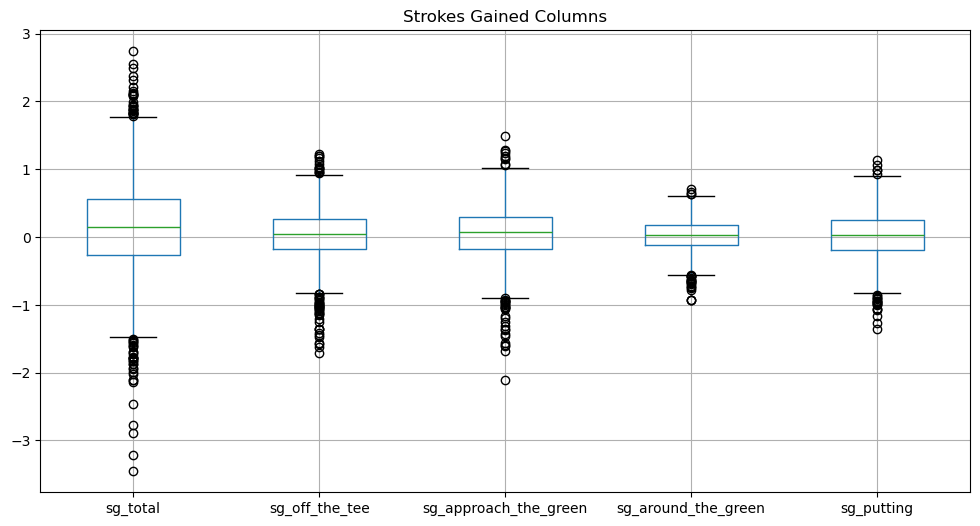

In [30]:
sg_cols = [col for col in df.columns if col.startswith('sg')]

df[sg_cols].boxplot(figsize=(12,6))
plt.title("Strokes Gained Columns")
plt.show()

We can see above that there are significant positive and negative outliers in 'strokes gained: total' but we do not want to eliminate this as we want to generalize to all golfers on the Tour.

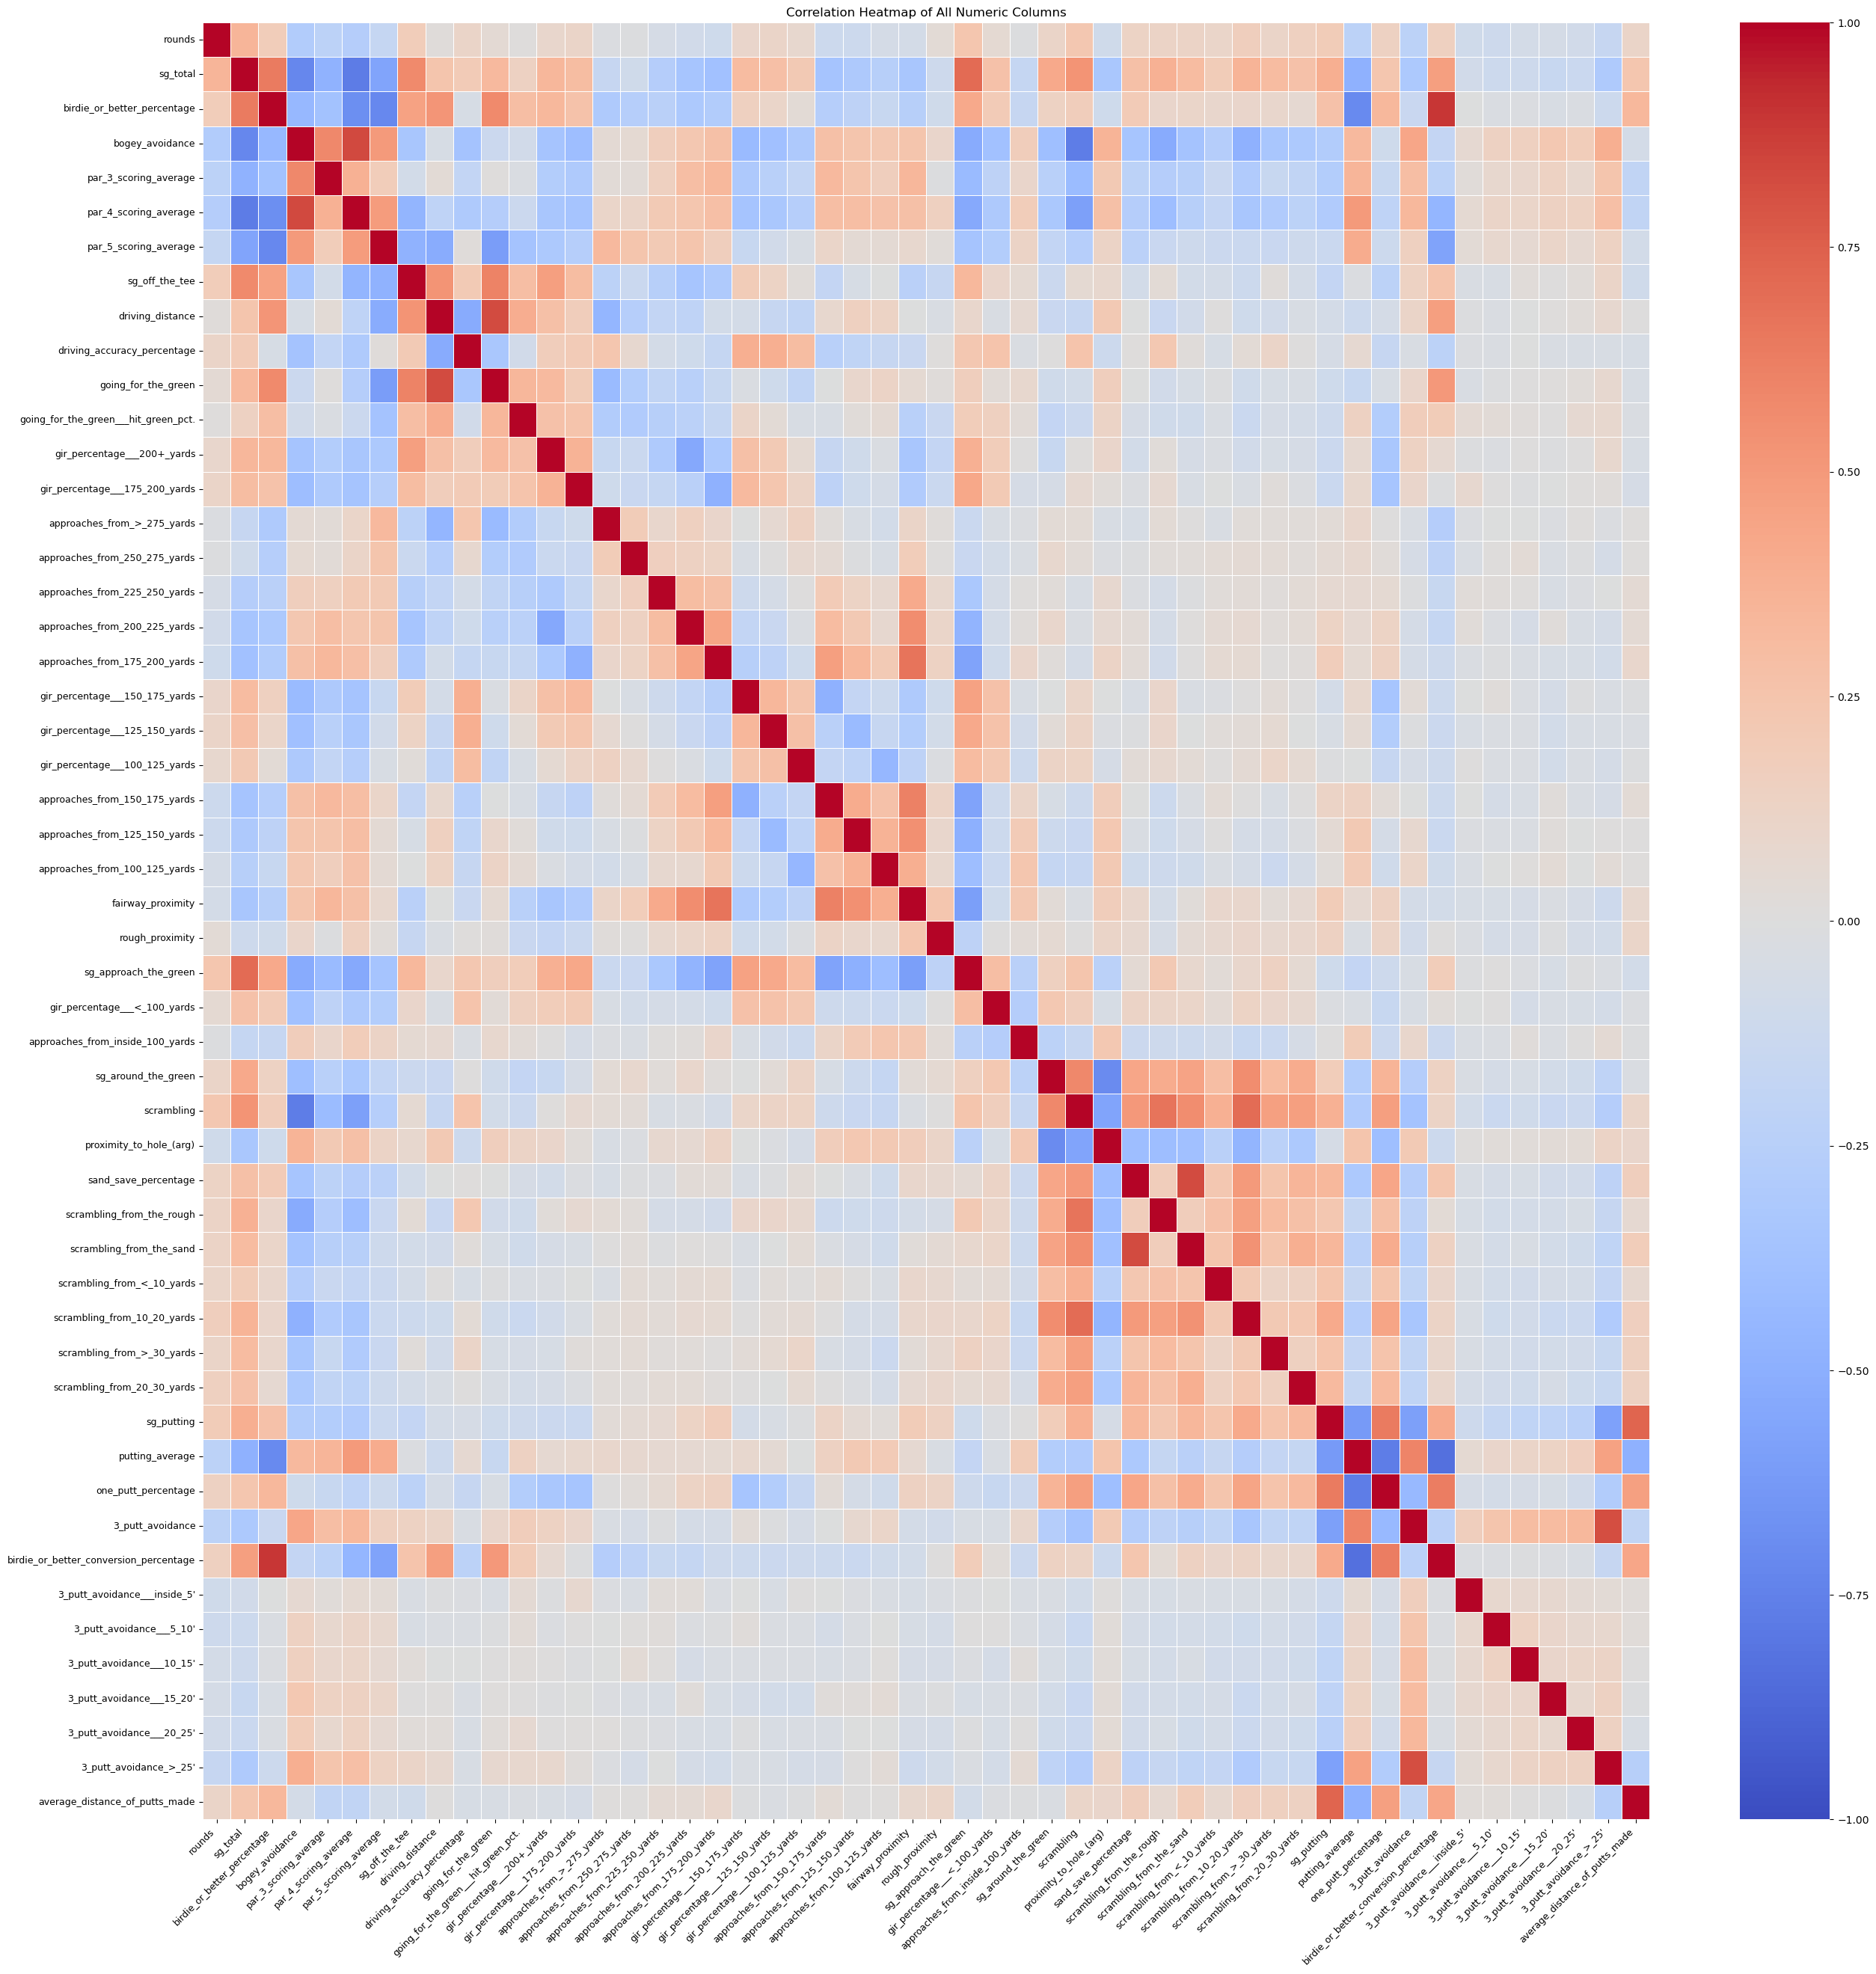

In [31]:
corr = df.corr(numeric_only=True)

n = len(corr.columns)
plt.figure(figsize=(max(10, n * 0.6), max(8, n * 0.6)))

ax = sns.heatmap(
    corr,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    annot=False
)

ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=9)
ax.set_yticks(np.arange(len(corr.index)) + 0.5)
ax.set_yticklabels(corr.index, rotation=0, fontsize=9)

plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()

We see some highly correlated features, let's use scatter plots to visualize correlation and determine whether we want to remove them

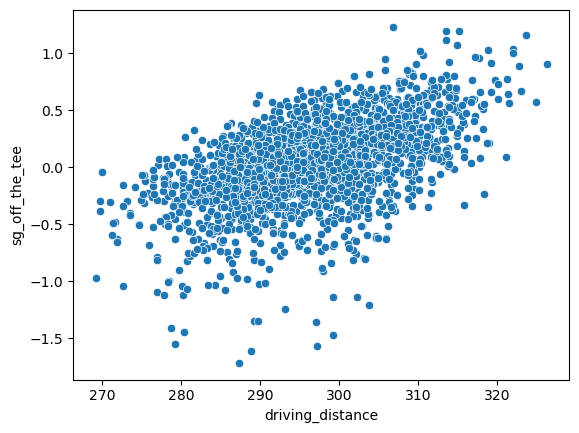

In [32]:
sns.scatterplot(x='driving_distance', y='sg_off_the_tee', data=df)
plt.show()

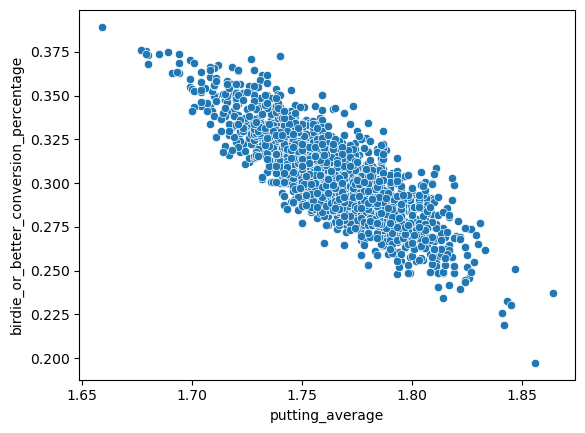

In [33]:
sns.scatterplot(x='putting_average', y='birdie_or_better_conversion_percentage', data=df)
plt.show()

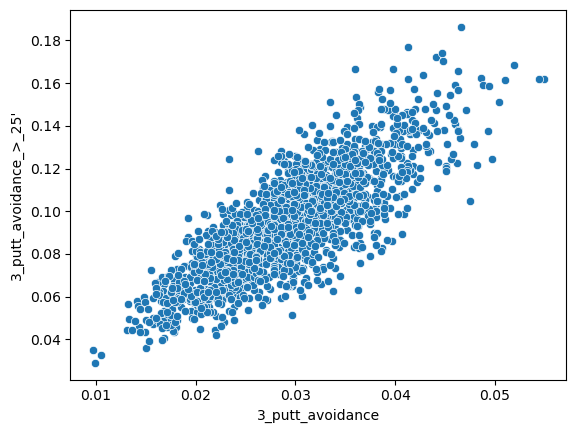

In [34]:
sns.scatterplot(x='3_putt_avoidance', y='3_putt_avoidance_>_25\'', data=df)
plt.show()

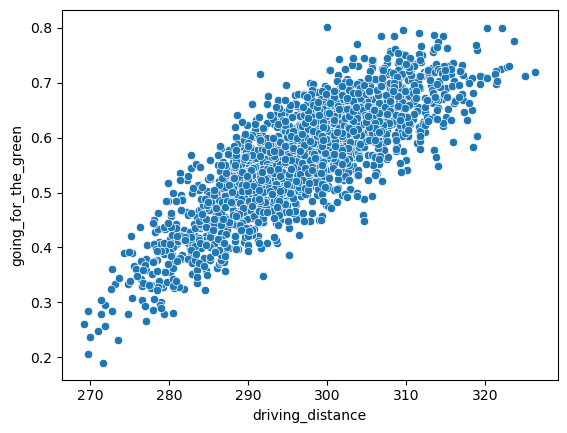

In [35]:
sns.scatterplot(x='driving_distance', y='going_for_the_green', data=df)
plt.show()

In [36]:
df.drop(columns=['3_putt_avoidance', 'birdie_or_better_conversion_percentage'], inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2064
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   year                                  2058 non-null   object 
 1   player                                2058 non-null   object 
 2   rounds                                2058 non-null   float64
 3   country                               2058 non-null   object 
 4   sg_total                              2058 non-null   float64
 5   birdie_or_better_percentage           2058 non-null   float64
 6   bogey_avoidance                       2058 non-null   float64
 7   par_3_scoring_average                 2058 non-null   float64
 8   par_4_scoring_average                 2058 non-null   float64
 9   par_5_scoring_average                 2058 non-null   float64
 10  sg_off_the_tee                        2058 non-null   float64
 11  driving_distance      

In [38]:
approach_dists = [col for col in df.columns if 'approaches' in col]
girs = [col for col in df.columns if 'gir_percentage' in col]
scrambling = [col for col in df.columns if 'scrambling' in col]
putting = [col for col in df.columns if 'putt' in col and 'putting_average' not in col]
sgs = [col for col in df.columns if col.startswith('sg')]

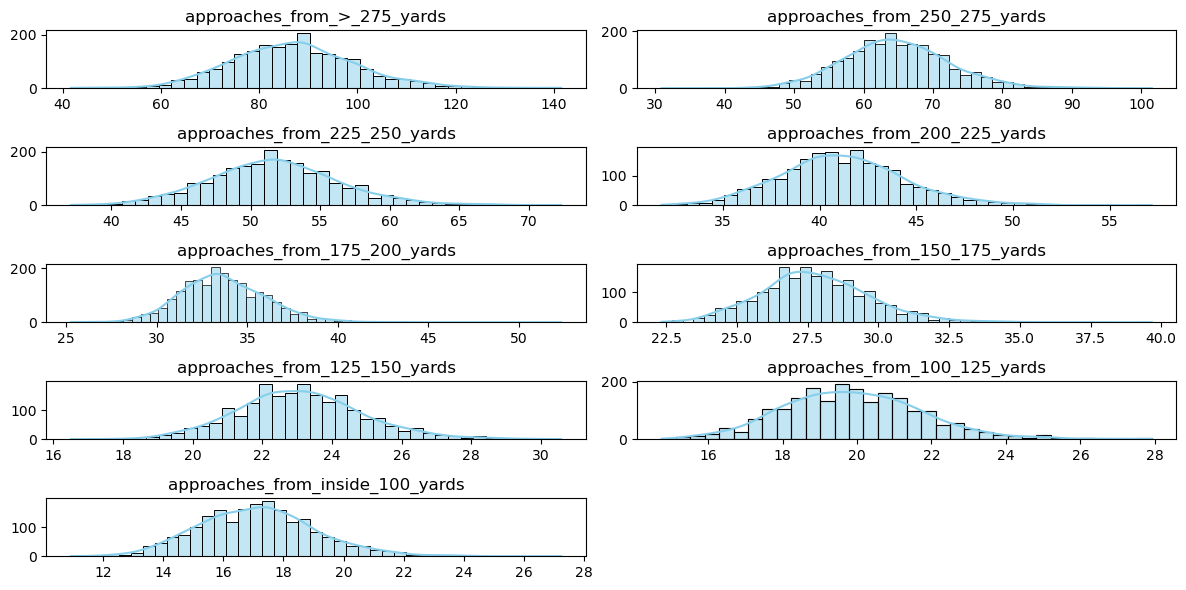

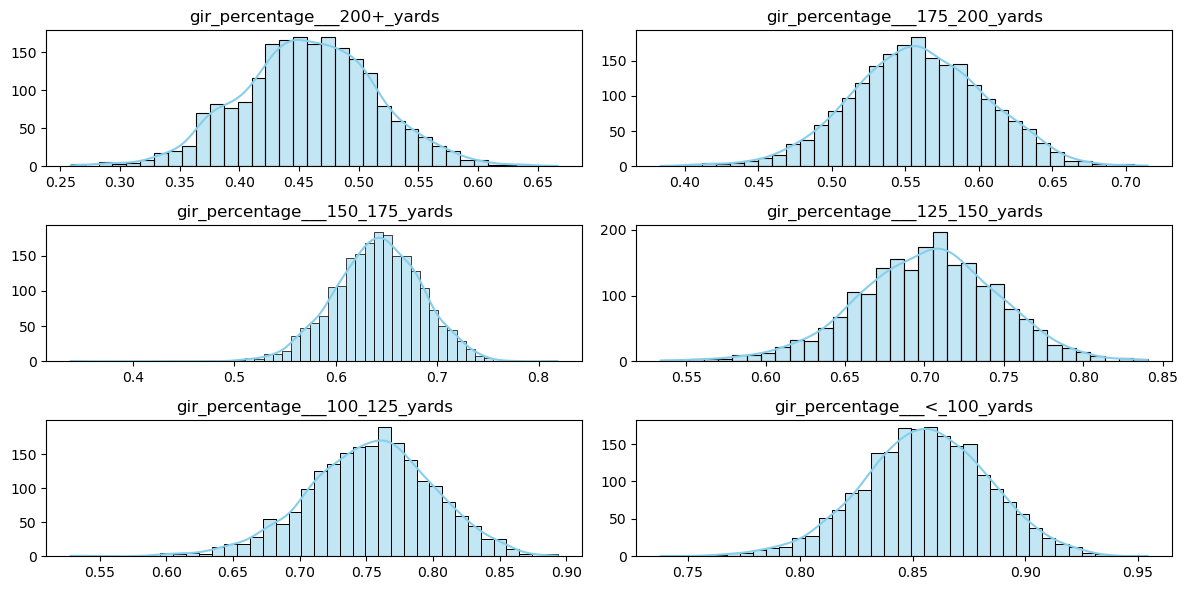

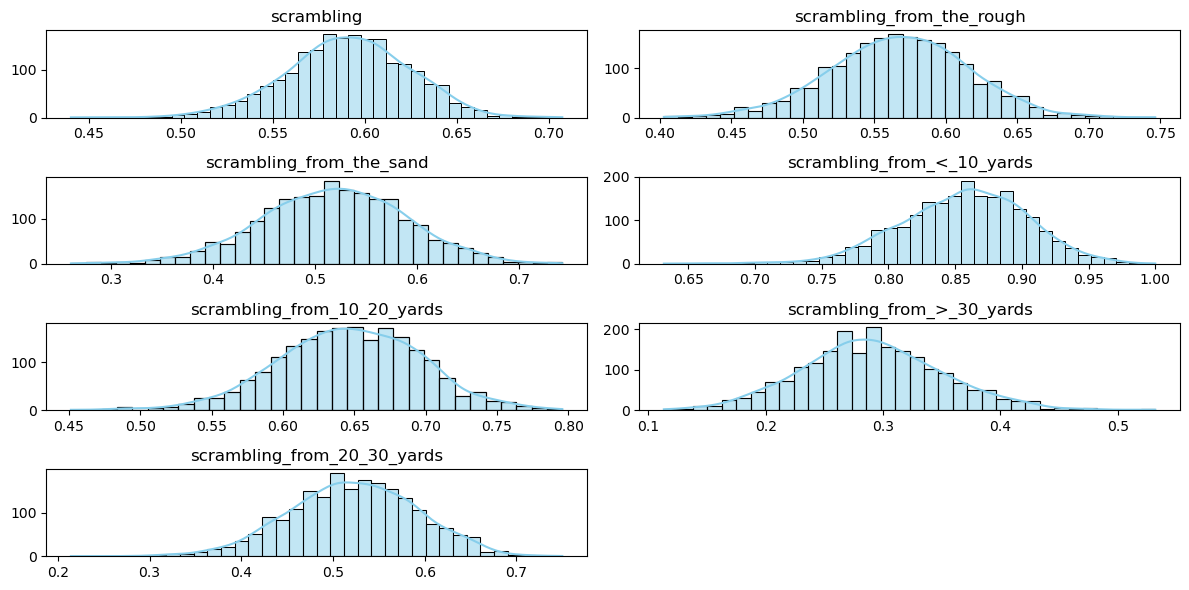

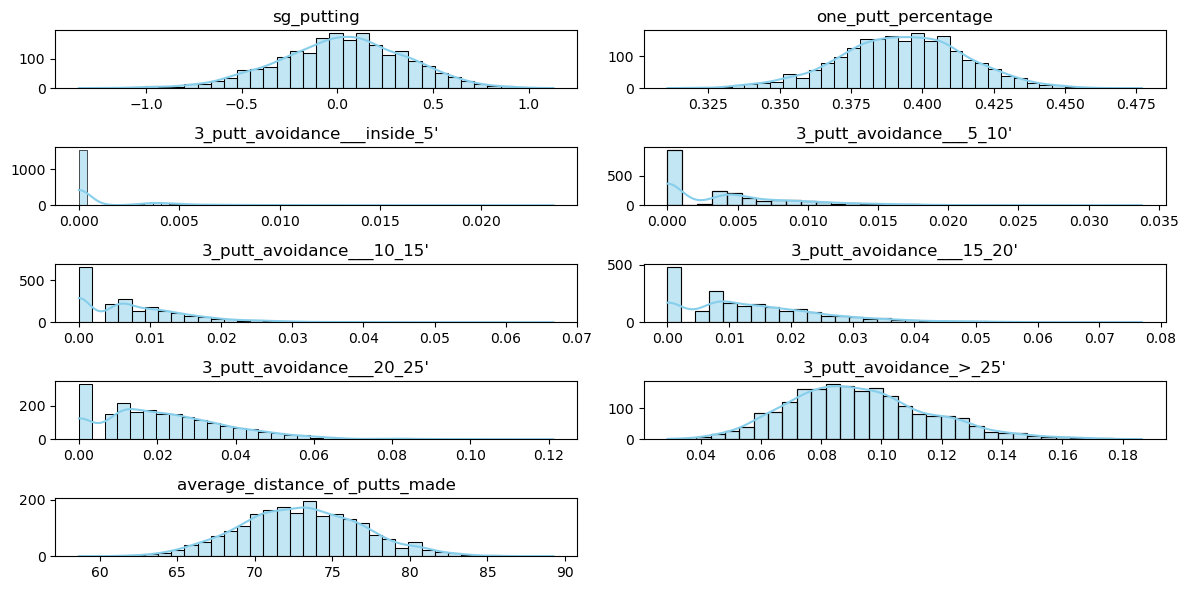

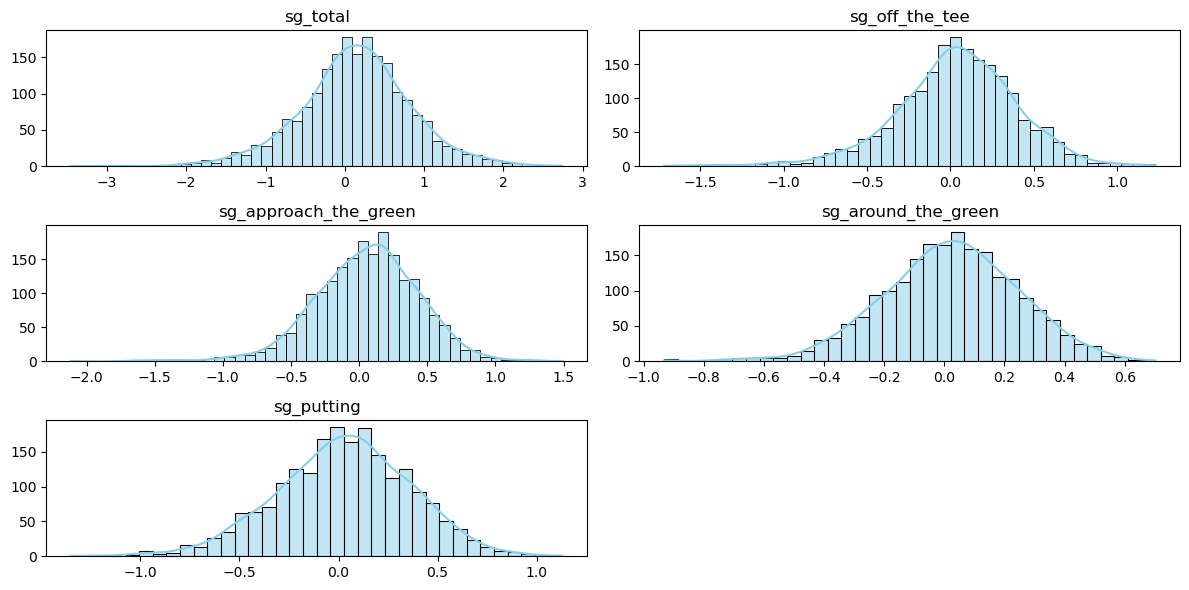

In [39]:
def hists(input_cols):
    n = len(input_cols)
    cols = 2
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    axes = axes.flatten()

    for i, col in enumerate(input_cols):
        sns.histplot(df[col], kde=True, color="skyblue", edgecolor="black", ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

hists(approach_dists)
hists(girs)
hists(scrambling)
hists(putting)
hists(sgs)

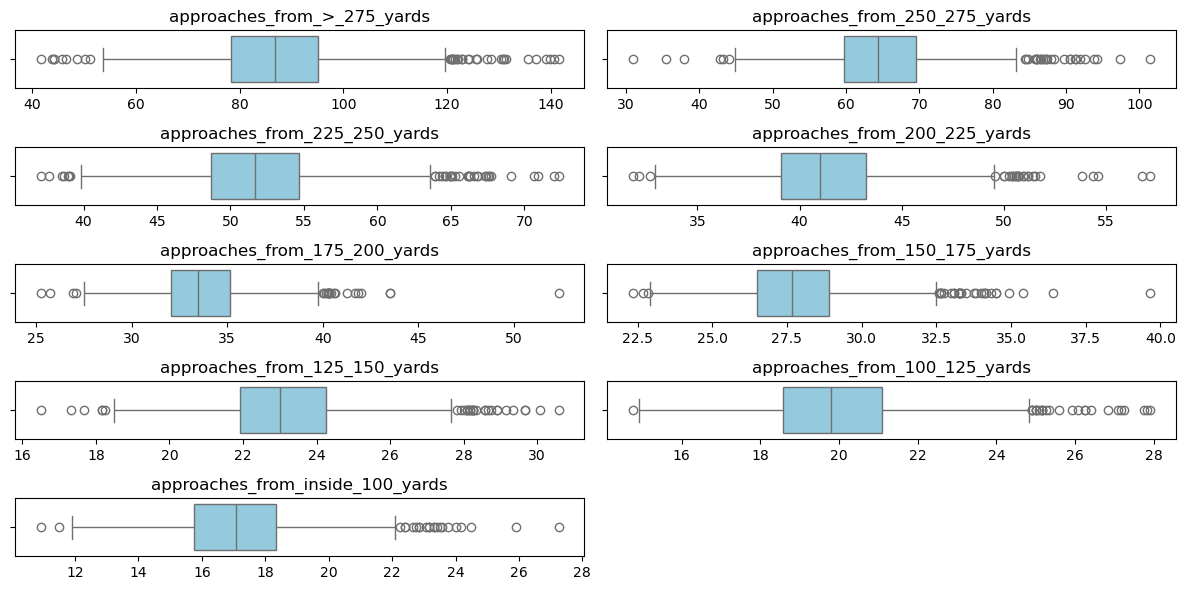

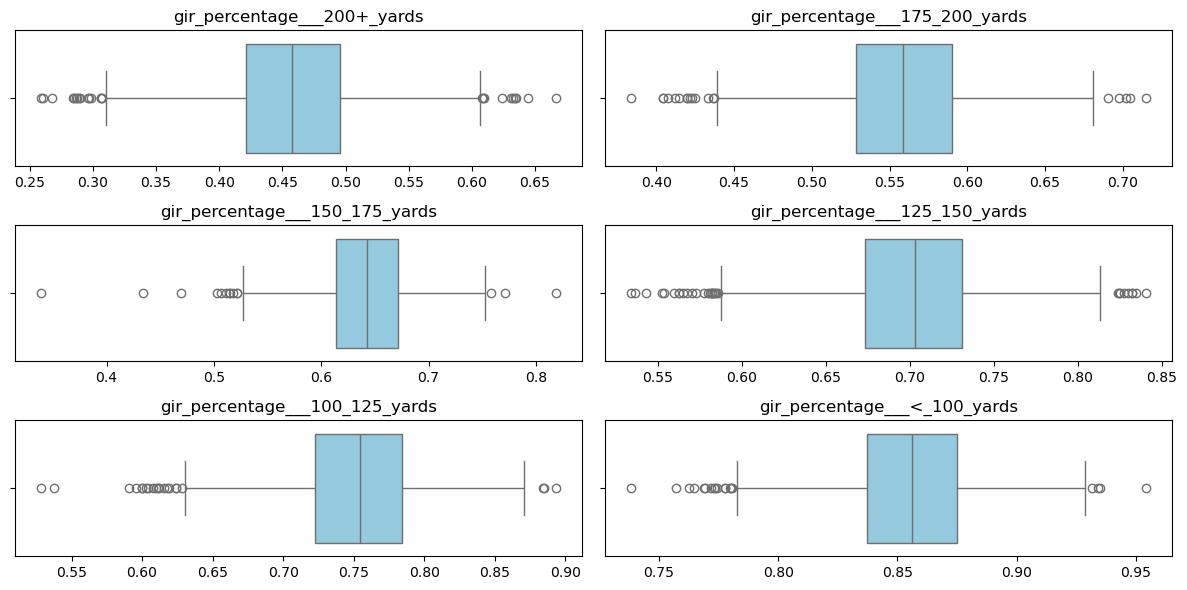

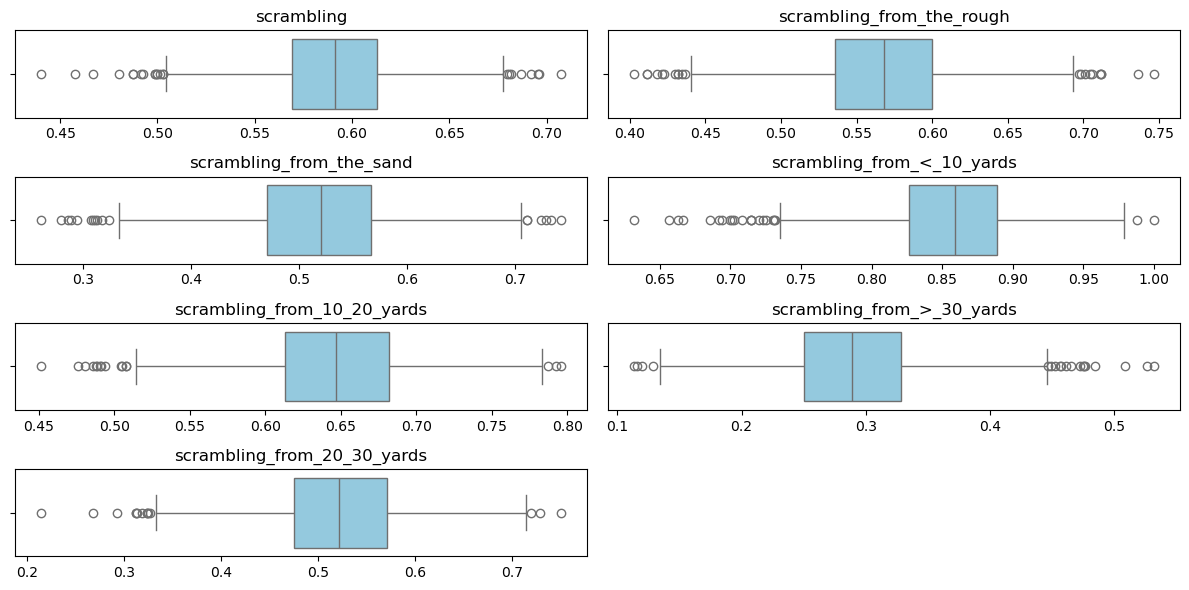

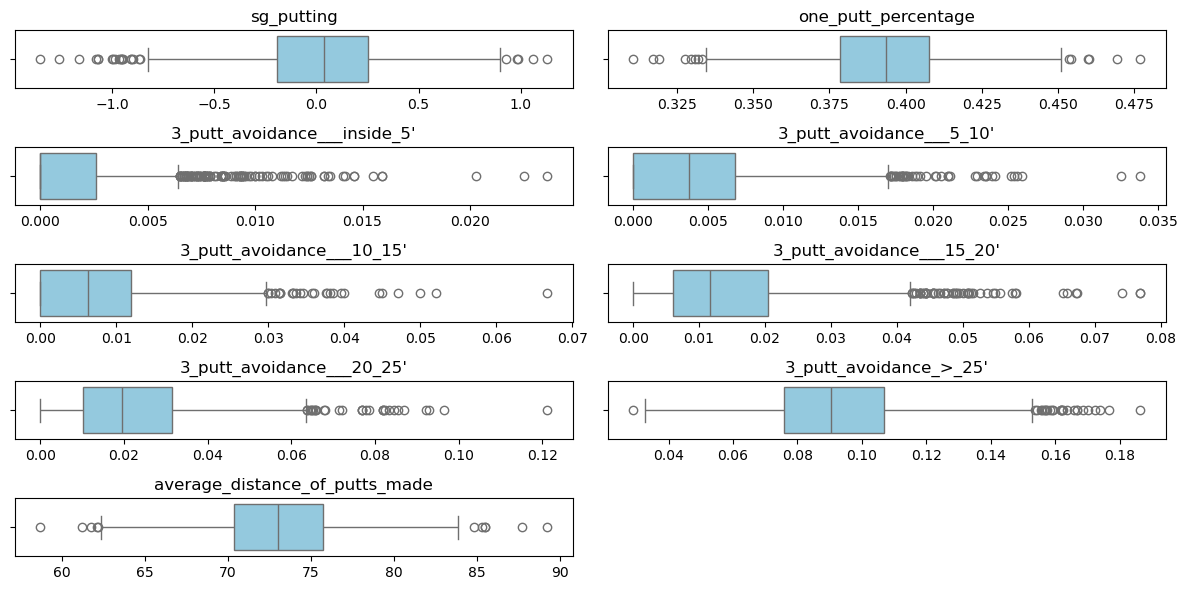

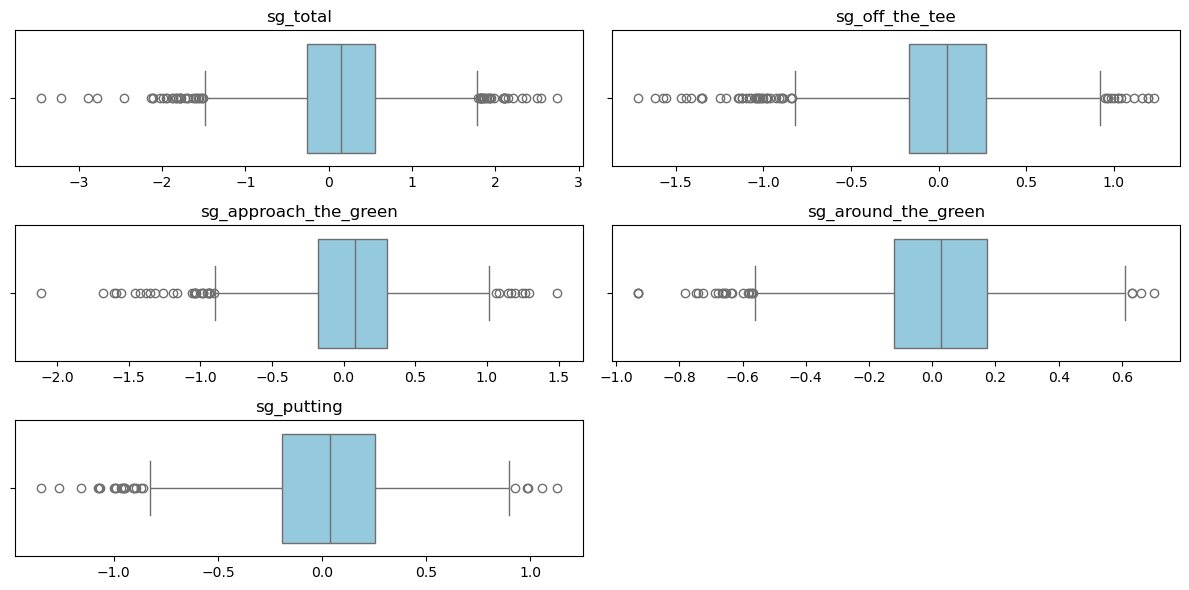

In [40]:
def boxes(input_cols):
    n = len(input_cols)
    cols = 2
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    axes = axes.flatten()

    for i, col in enumerate(input_cols):
        sns.boxplot(x=df[col], color="skyblue", ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Remove any empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

boxes(approach_dists)
boxes(girs)
boxes(scrambling)
boxes(putting)
boxes(sgs)

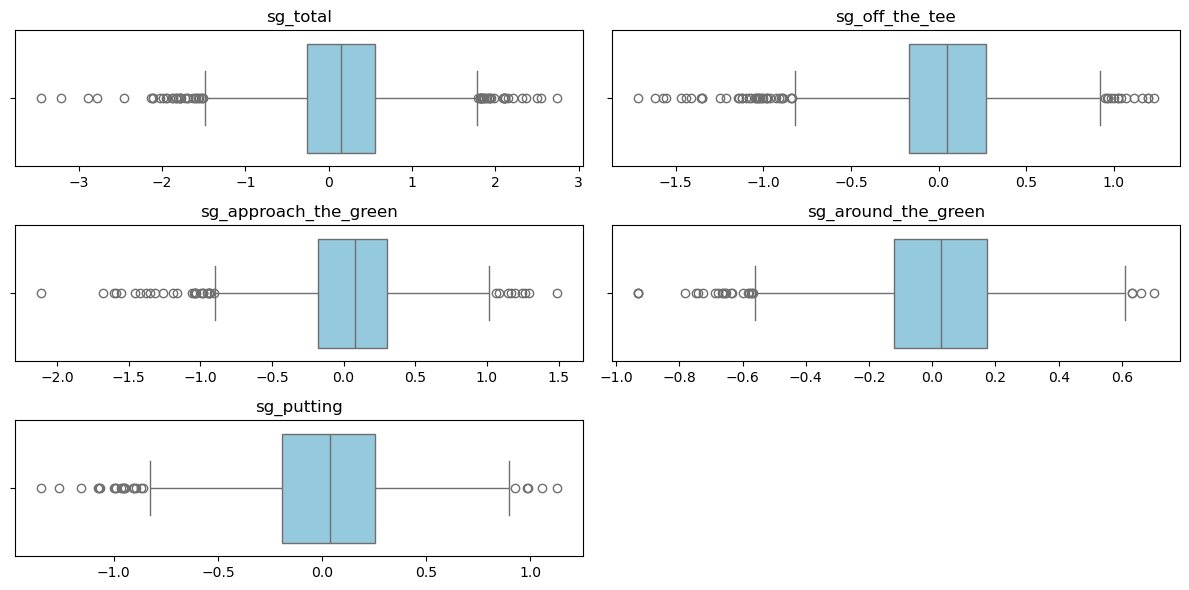

In [41]:
boxes(sgs)

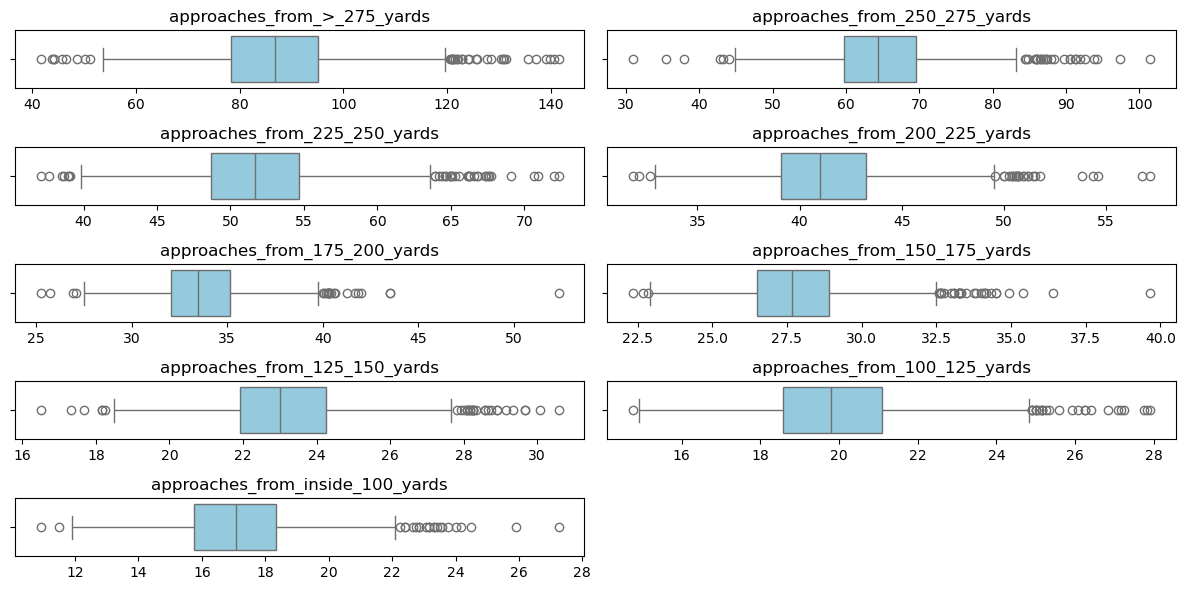

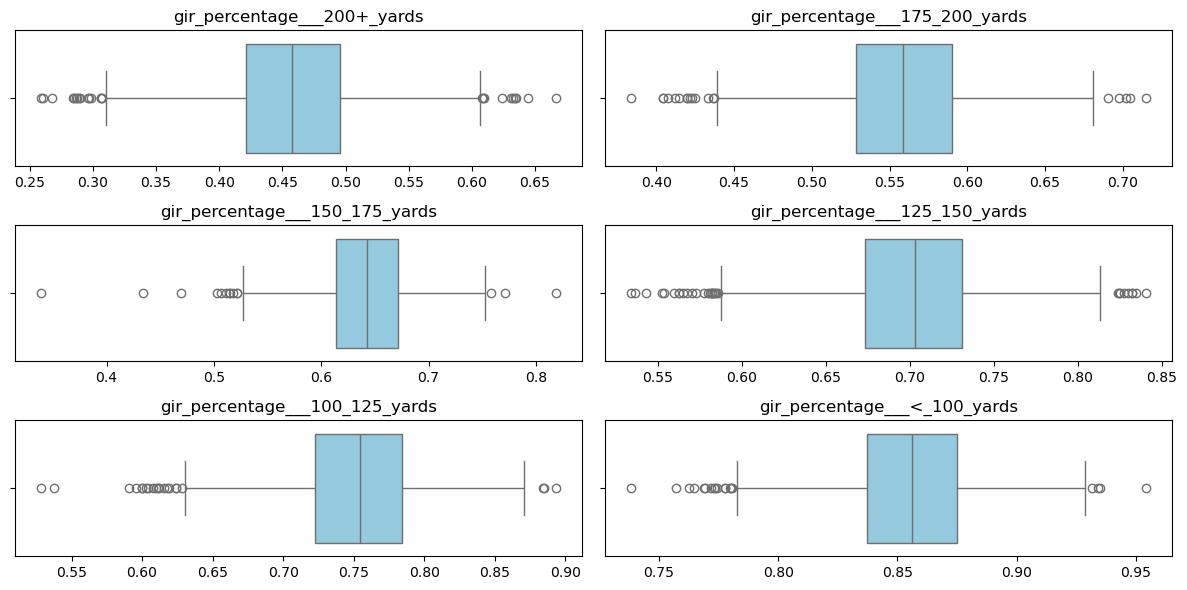

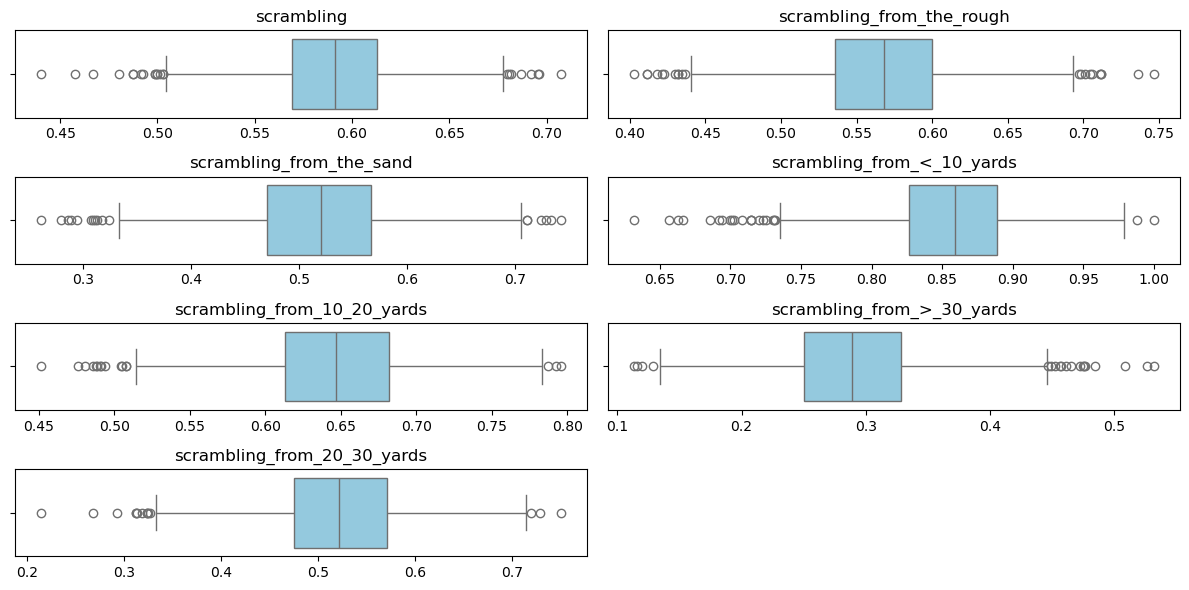

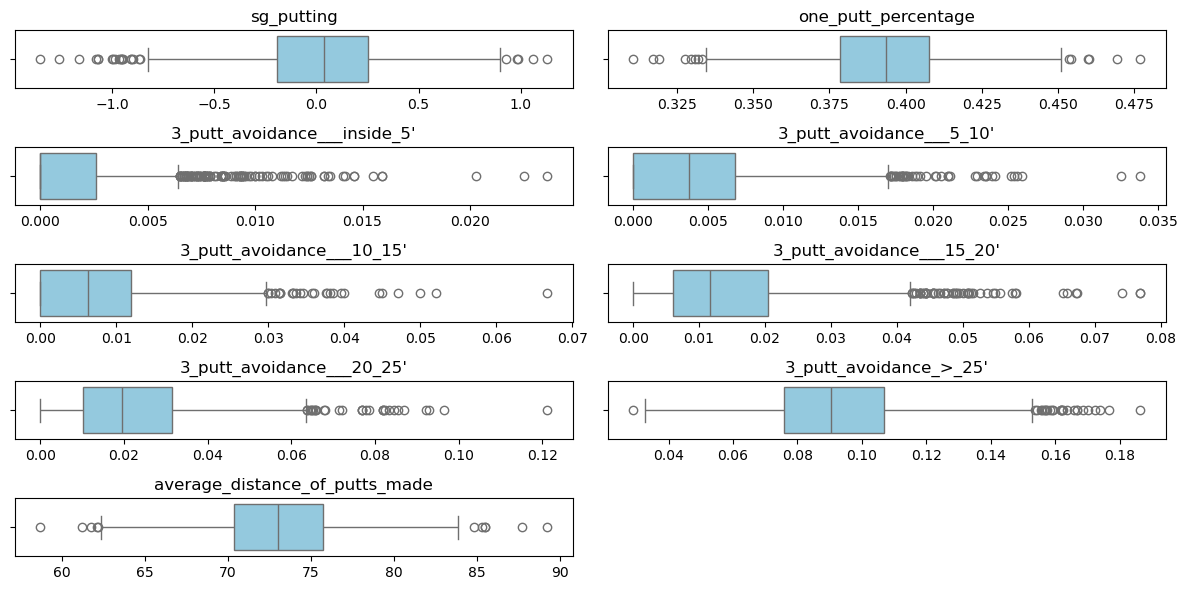

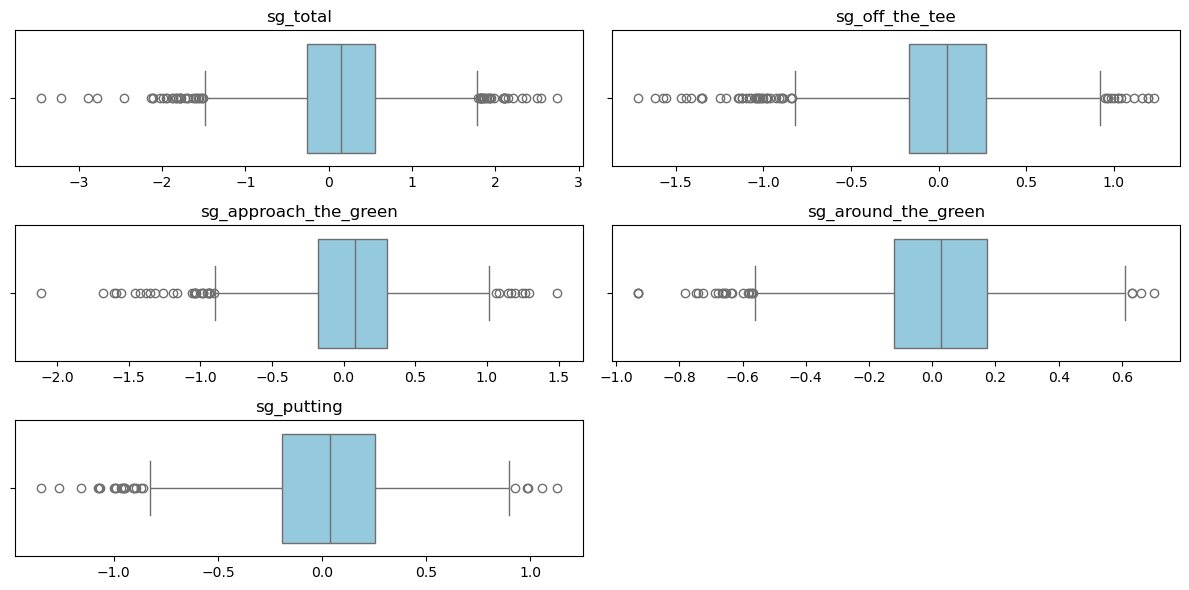

In [42]:
boxes(approach_dists)
boxes(girs)
boxes(scrambling)
boxes(putting)
boxes(sgs)

In [43]:
df.to_csv('cleaned_pgatour_data.csv', index=False)